# Ejercicio 3

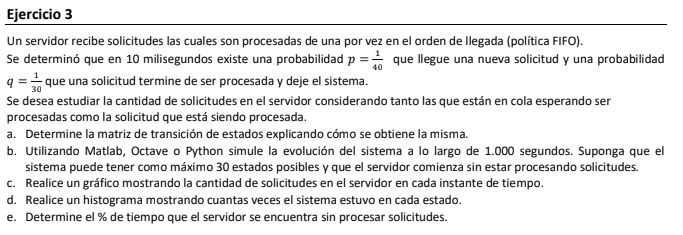

## Matriz de transición de estados

Para resolver este ejercicio vamos a definir 2 eventos independientes entre sí:

    A: arriba al sistema una nueva solicitud
    E: una solicitud es procesada y egresa del sistema

Esto nos permitirá descomponer a los estados del servidor dependiendo de cuántas solicitudes se estén procesando. La matriz de transición de estados quedaría entonces:

    M = | P0->0   P0->1   P0->2   P0->3  P0->4  ... |
        | P1->0   P1->1   P1->2   P1->3  P1->4  ... |
        | P2->0   P2->1   P2->2   P2->3  P2->4  ... |
        |  ...     ...     ...     ...    ...   ... |

Sabemos que:

    P(A) = p = 1/40
    P(E) = q = 1/30
    r = P(~A) = 1-P(A) = 1-1/40 = 39/40
    s = P(~E) = 1-P(E) = 1-1/30 = 29/30

Si hay solicitudes pendientes:
- La probabilidad que en el próximo estado haya una solicitud **menos** es r*q
- La probabilidad que en el próximo estado haya una solicitud **más** es p*s
- La probabilidad de quedar **igual** es r*s+p*q

Si no hay solicitudes pendientes:
- La probabilidad que en el próximo estado haya una solicitud **más** es p
- La probabilidad de quedar **igual** es r

Entonces, podemos reescribir la matriz de transición de estados como:
    
    M = |   r       p       0       0      0    ... |
        |  r*q   r*s+p*q   p*s      0      0    ... |
        |   0      r*q    r*s+p*q  p*s     0    ... |
        |  ...     ...     ...     ...    ...   ... |

## Simulación con 1.000 segundos suponiendo que no hay solicitudes por procesar al comienzo

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000  # 1.000 segundos en intervalos de 10 milisegundos

solicitudes_en_proceso = 0
estados = []
for i in range(N):
    # Agrego estado a log
    estados.append(solicitudes_en_proceso)

    # probabilidad de terminar una solicitud en proceso
    if solicitudes_en_proceso > 0 and np.random.rand() < 1.0/30:
        solicitudes_en_proceso = solicitudes_en_proceso - 1

    # probabilidad de que ingrese una solicitud nueva
    if np.random.rand() < 1.0/40:
        solicitudes_en_proceso = solicitudes_en_proceso + 1

Procedemos a graficar la cantidad de solicitudes en el servidor en función del tiempo.

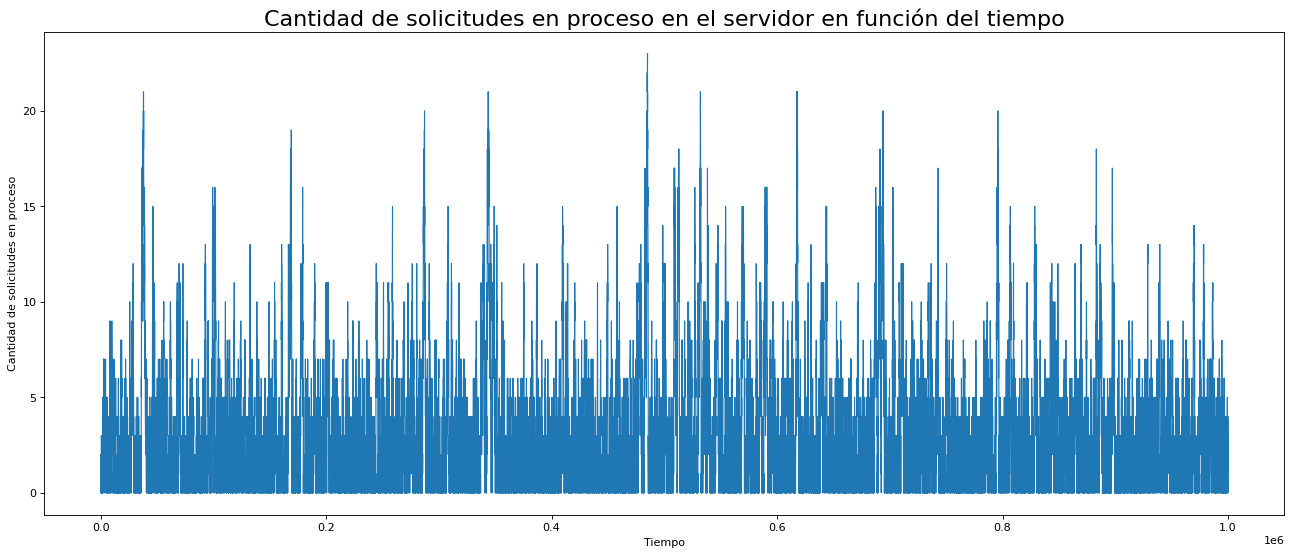

In [15]:
plt.figure(figsize=(20, 8), dpi=80)
plt.title('Cantidad de solicitudes en proceso en el servidor en función del tiempo'.format(N), size=20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de solicitudes en proceso')
plt.plot(estados, linewidth=1.0)
plt.show()

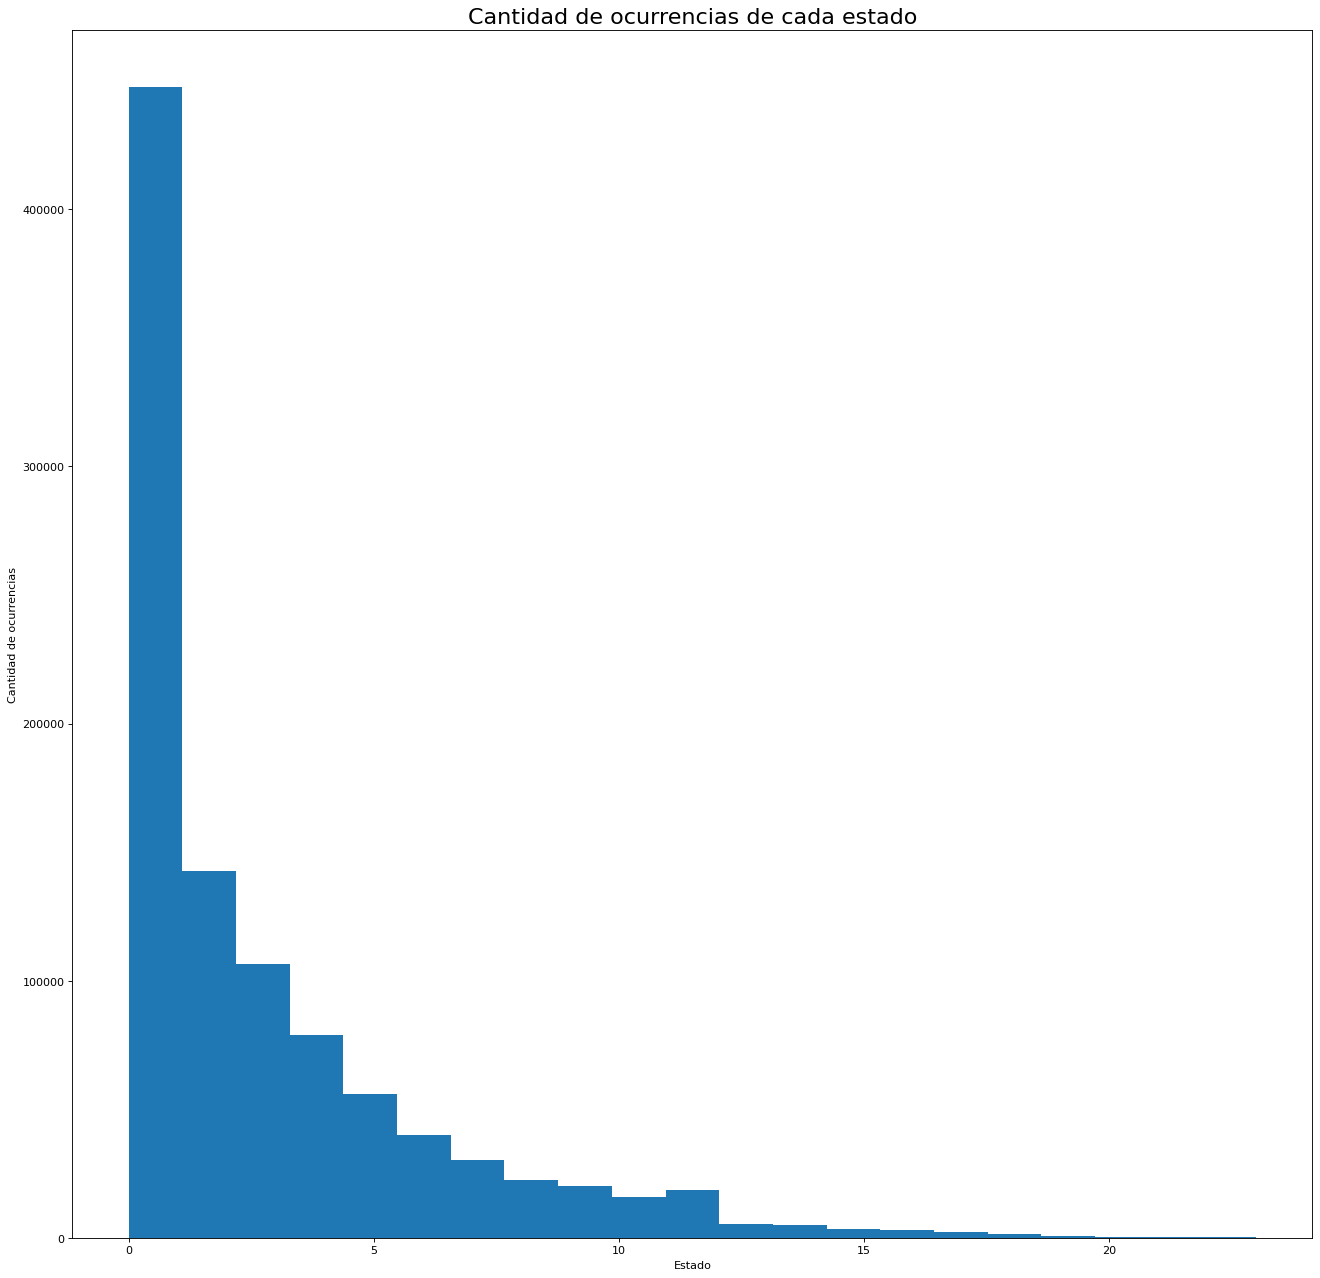

In [17]:
plt.figure(figsize=(20, 20), dpi=80)
plt.title('Cantidad de ocurrencias de cada estado'.format(N), size=20)
plt.xlabel('Estado')
plt.ylabel('Cantidad de ocurrencias')
plt.hist(estados, bins='sturges', linewidth=1.0, )
plt.show()

Procedemos ahora a analizar el tiempo ocioso del servidor, es decir, el porcentaje de tiempo durante el cual no está procesando solicitudes.

In [18]:
tiempo_sin_procesar_solicitudes = len(list(filter(lambda x: x == 0, estados))) / len(estados) * 100
'El porcentaje de tiempo que el sistema pasa sin procesar solicitudes es {:.3f} %'.format(
    tiempo_sin_procesar_solicitudes)

'El porcentaje de tiempo que el sistema pasa sin procesar solicitudes es 25.382 %'